In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
staf_factory = StafFactory('csvs_test')

external_inflows = staf_factory.build_stafs(['1'])
internal_stafs = staf_factory.build_stafs(['2'])
external_outflows = staf_factory.build_stafs(['3'])

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [5]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [6]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [7]:
for x in res_inflows:
    print(x)
    
print()
print()

for key, values in res_dict.items():
    print(key)
    for val in values:
        print(val)
    print()
    
print()
print()

for x in res_outflows:
    print(x)

Staf: Flow1, ID: 1


Process: TP3: Test Process 3, STAFDB ID: 3
Staf: Stock1, ID: 2

Process: TP2: Test Process 2, STAFDB ID: 2



Staf: Flow2, ID: 3


In [8]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [9]:
sample_size = 3000

with math_model.pm_model:
    trace = pm.sample(sample_size, init='advi')


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 0.8243:   5%|▍         | 9684/200000 [00:03<01:02, 3048.17it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1.6718
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Staf_3_1-2_1, Staf_1_2-2_1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array ind

In [10]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -5.2391, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 491.37it/s]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Estimates of: External Inflows

Input Flow: Flow1: 100.0


Estimates of: Internal Stafs

Internal Staf: Flow1: 70.0


Estimates of: External Outflows

Output Flow: Flow2: 170.0
TC: Flow2: 1.0




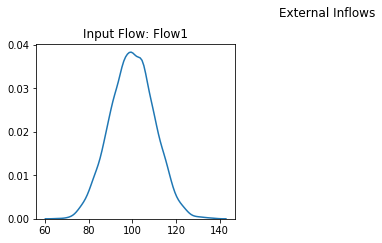

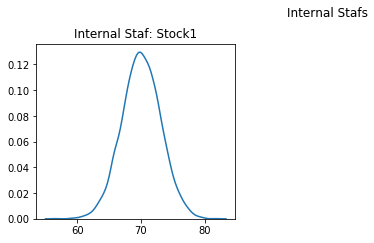

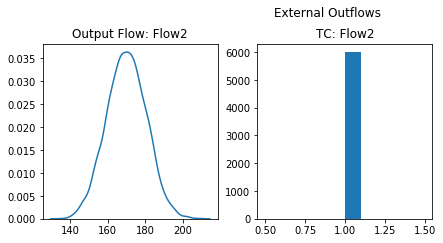

In [11]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)